In [74]:
import tensorflow as tf
import tensorflow_datasets as tfds
tfds.disable_progress_bar()

import numpy as np
import matplotlib.pyplot as plt

import importlib
import utils.ml_utils as ml_utils
importlib.reload(utils.ml_utils)

from tensorflow.keras import layers
from tensorflow import keras 

In [15]:
# Constants to be used throughout the file
SHUFFLE_SEED = 524287 # Seed for shuffling

IMG_SIZE = 200 # All images in the dataset will be resized to this size

BATCH_SIZE = 32 # Batch size
SHUFFLE_BUFFER_SIZE = 1000 # Buffer size for shuffling

In [2]:
# Seed to be used for shuffling
read_config = tfds.ReadConfig(shuffle_seed=SHUFFLE_SEED)

In [3]:
# Read training data
(raw_train, raw_validation, raw_test), label_names = ml_utils.load_dataset('cats_vs_dogs')

Training Data Summary
No. of examples: 18610
Class: 0 :::: Count: 9378 :::: Percentage: 50.39226222461043
Class: 1 :::: Count: 9232 :::: Percentage: 49.60773777538957

Validation Data Summary
No. of examples: 2326
Class: 0 :::: Count: 1120 :::: Percentage: 48.15133276010318
Class: 1 :::: Count: 1206 :::: Percentage: 51.84866723989682

Test Data Summary
No. of examples: 2326
Class: 0 :::: Count: 1160 :::: Percentage: 49.871023215821154
Class: 1 :::: Count: 1166 :::: Percentage: 50.128976784178846


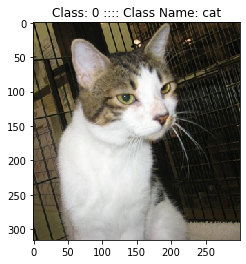

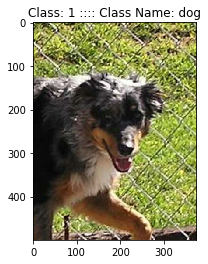

In [11]:
# Print some images
for img, lbl in raw_train.take(2):
    ml_utils.show_image(img, lbl, label_names)

In [8]:
# Resize images to IMG_SIZE x IMG_SIZE
train = raw_train.map(lambda img, lbl: ml_utils.resize_image(img, lbl, IMG_SIZE))
validation = raw_validation.map(lambda img, lbl: ml_utils.resize_image(img, lbl, IMG_SIZE))
test = raw_test.map(lambda img, lbl: ml_utils.resize_image(img, lbl, IMG_SIZE))

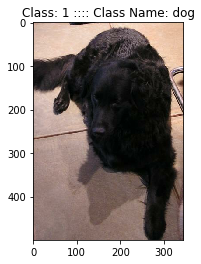

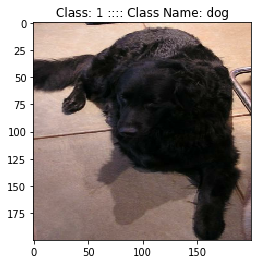

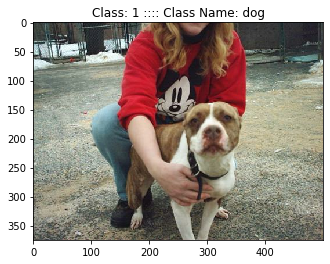

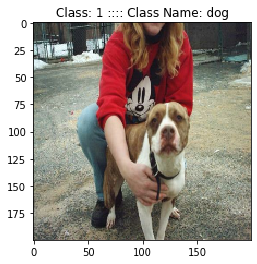

In [12]:
# Compare original and resized images
for img, lbl in raw_train.take(2):
    # Original image
    ml_utils.show_image(img, lbl, label_names)
  
    # Resized image
    reszd_img, _ = ml_utils.resize_image(img, lbl, IMG_SIZE)
    ml_utils.show_image(reszd_img, lbl, label_names)

In [17]:
# Diving data into batches
train_batches = train.shuffle(
    buffer_size=SHUFFLE_BUFFER_SIZE,
    seed=SHUFFLE_SEED).batch(BATCH_SIZE)
validation_batches = validation.batch(BATCH_SIZE)
test_batches = test.batch(BATCH_SIZE)

In [19]:
# Simple convnet model
def simple_convnet_model():
    model = keras.models.Sequential()
    model.add(layers.Conv2D(
        32, (3, 3), 
        activation='relu', 
        kernel_initializer='he_uniform', 
        padding='same', 
        input_shape=(IMG_SIZE, IMG_SIZE, 3)))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Flatten())
    model.add(layers.Dense(128, activation='relu', kernel_initializer='he_uniform'))
    model.add(layers.Flatten())
    model.add(layers.Dense(1, activation='sigmoid'))
    return model

In [20]:
# Build model
model=simple_convnet_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 200, 200, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 100, 100, 32)      0         
_________________________________________________________________
flatten (Flatten)            (None, 320000)            0         
_________________________________________________________________
dense (Dense)                (None, 128)               40960128  
_________________________________________________________________
flatten_1 (Flatten)          (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 129       
Total params: 40,961,153
Trainable params: 40,961,153
Non-trainable params: 0
____________________________________________

In [21]:
# Compile model
opt = keras.optimizers.SGD(lr=0.001, momentum=0.9)
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

In [22]:
# Start training
history = model.fit(train_batches,
                    epochs=10,
                    validation_data=validation_batches)

Epoch 1/10
582/582 [==============================] - 89s 154ms/step - loss: 0.6935 - accuracy: 0.5356 - val_loss: 0.6840 - val_accuracy: 0.5632
Epoch 2/10
582/582 [==============================] - 84s 145ms/step - loss: 0.6739 - accuracy: 0.5832 - val_loss: 0.6828 - val_accuracy: 0.5486
Epoch 3/10
582/582 [==============================] - 83s 143ms/step - loss: 0.6651 - accuracy: 0.5916 - val_loss: 0.6660 - val_accuracy: 0.6122
Epoch 4/10
582/582 [==============================] - 82s 141ms/step - loss: 0.6557 - accuracy: 0.6135 - val_loss: 0.6521 - val_accuracy: 0.6247
Epoch 5/10
582/582 [==============================] - 82s 141ms/step - loss: 0.6493 - accuracy: 0.6215 - val_loss: 0.6449 - val_accuracy: 0.6384
Epoch 6/10
582/582 [==============================] - 82s 140ms/step - loss: 0.6463 - accuracy: 0.6241 - val_loss: 0.6496 - val_accuracy: 0.6419
Epoch 7/10
582/582 [==============================] - 80s 138ms/step - loss: 0.6397 - accuracy: 0.6330 - val_loss: 0.6404 - val_ac

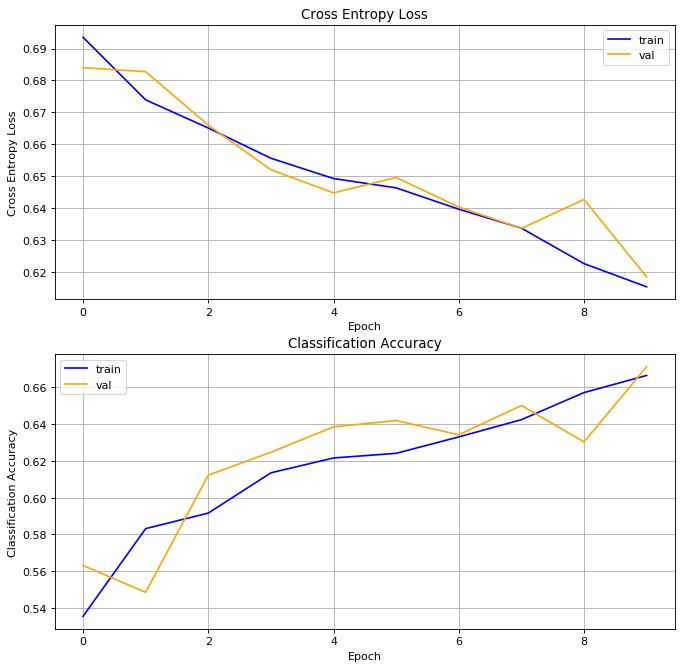

In [75]:
# Plot diagnostic learning curves
ml_utils.summarize_diagnostics(history)

In [82]:
# Print test loss and accuracy
loss, accuracy = model.evaluate(test_batches)
print('\nTest Data :::: Loss: {loss} :::: Accuracy: {accuracy}'.format(
loss=loss,
accuracy=accuracy))

     73/Unknown - 8s 105ms/step - loss: 0.6079 - accuracy: 0.6763
Test Data :::: Loss: 0.6079221461733727 :::: Accuracy: 0.6762682795524597
